In [62]:
import pandas as pd

# Load the dataset
file_path = "processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "num"
]

# Read the data
df = pd.read_csv(file_path, header=None, names=column_names, na_values="?")

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


(None,
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
 0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
 1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
 2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
 3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
 4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
 
    slope   ca  thal  num  
 0    3.0  0.0   6.0    0  
 1    2.0  3.0   3.0    2  
 2    2.0  2.0   7.0    1  
 3    3.0  0.0   3.0    0  
 4    1.0  0.0   3.0    0  )

In [63]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features (excluding the target variable 'num')
X_scaled = scaler.fit_transform(df.iloc[:, :-1])


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Initialize KNNImputer to handle missing values
knn_imputer = KNNImputer(n_neighbors=5)  # You can change n_neighbors as needed

# Apply KNN imputation to fill missing values
df_imputed = knn_imputer.fit_transform(df.iloc[:, :-1])  # Exclude the target variable

# Standardize the imputed dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)


In [65]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identify categorical columns that need encoding
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Apply One-Hot Encoding (fixing the sparse_output issue)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_columns])

# Convert encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns and concatenate encoded features
df_encoded = df.drop(columns=categorical_columns).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

print("Encoding completed. Processed dataset:")
print(df_encoded.head())


Encoding completed. Processed dataset:
    age  trestbps   chol  thalach  oldpeak  num  sex_0.0  sex_1.0  cp_1.0  \
0  63.0     145.0  233.0    150.0      2.3    0      0.0      1.0     1.0   
1  67.0     160.0  286.0    108.0      1.5    2      0.0      1.0     0.0   
2  67.0     120.0  229.0    129.0      2.6    1      0.0      1.0     0.0   
3  37.0     130.0  250.0    187.0      3.5    0      0.0      1.0     0.0   
4  41.0     130.0  204.0    172.0      1.4    0      1.0      0.0     0.0   

   cp_2.0  ...  slope_3.0  ca_0.0  ca_1.0  ca_2.0  ca_3.0  ca_nan  thal_3.0  \
0     0.0  ...        1.0     1.0     0.0     0.0     0.0     0.0       0.0   
1     0.0  ...        0.0     0.0     0.0     0.0     1.0     0.0       1.0   
2     0.0  ...        0.0     0.0     0.0     1.0     0.0     0.0       0.0   
3     0.0  ...        1.0     1.0     0.0     0.0     0.0     0.0       1.0   
4     1.0  ...        0.0     1.0     0.0     0.0     0.0     0.0       1.0   

   thal_6.0  thal_7.0  

In [66]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Apply Label Encoding
label_encoders = {}  # Store encoders for later use if needed
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transform the column
    label_encoders[col] = le  # Save encoder for inverse transformation if needed

print("Label Encoding completed. Processed dataset:")
print(df.head())


Label Encoding completed. Processed dataset:
    age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0    1   0     145.0  233.0    1        2    150.0      0      2.3   
1  67.0    1   3     160.0  286.0    0        2    108.0      1      1.5   
2  67.0    1   3     120.0  229.0    0        2    129.0      1      2.6   
3  37.0    1   2     130.0  250.0    0        0    187.0      0      3.5   
4  41.0    0   1     130.0  204.0    0        2    172.0      0      1.4   

   slope  ca  thal  num  
0      2   0     1    0  
1      1   3     0    2  
2      1   2     2    1  
3      2   0     0    0  
4      0   0     0    0  


In [67]:
from imblearn.over_sampling import SMOTEN
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.iloc[:, :-1]  # All columns except the target
y = df["cp"]        # Target column

# Split dataset before applying SMOTEN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEN to handle class imbalance
smoten = SMOTEN(random_state=42)
X_train_resampled, y_train_resampled = smoten.fit_resample(X_train, y_train)

print("SMOTEN applied. Resampled class distribution:")
print(y_train_resampled.value_counts())


SMOTEN applied. Resampled class distribution:
cp
2    115
3    115
1    115
0    115
Name: count, dtype: int64


In [68]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.iloc[:, :-1]  # All columns except the target
y = df["cp"]        # Target column

# Split dataset before applying random sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Apply Random Oversampling (increase minority class instances)
oversampler = RandomOverSampler(random_state=62)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# Apply Random Undersampling (reduce majority class instances)
undersampler = RandomUnderSampler(random_state=62)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Check the new class distribution
print("Oversampled Class Distribution:")
print(y_train_over.value_counts())

print("Undersampled Class Distribution:")
print(y_train_under.value_counts())


Oversampled Class Distribution:
cp
3    115
2    115
1    115
0    115
Name: count, dtype: int64
Undersampled Class Distribution:
cp
0    18
1    18
2    18
3    18
Name: count, dtype: int64


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter search space
param_dist = {
    "n_estimators": randint(50, 200),  # Number of trees in forest
    "max_depth": randint(5, 50),  # Depth of each tree
    "min_samples_split": randint(2, 10),  # Minimum samples to split a node
    "min_samples_leaf": randint(1, 10),  # Minimum samples required for a leaf node
    "criterion": ["gini", "entropy"],  # Splitting strategy
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search with 10 iterations and 5-fold cross-validation
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1
)

# Fit the model with oversampled training data
random_search.fit(X_train_over, y_train_over)

# Get the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 46, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 104}


In [70]:
# Extract the best model
best_rf = random_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Model Accuracy: 0.9672131147540983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.90      0.95        10
           2       0.94      0.94      0.94        17
           3       0.97      1.00      0.98        29

    accuracy                           0.97        61
   macro avg       0.98      0.96      0.97        61
weighted avg       0.97      0.97      0.97        61



In [73]:
# Compute RMSE (Root Mean Squared Error)
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, average_precision_score # Import necessary functions

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Compute MAR (Mean Absolute Rate)
mar = np.mean(np.abs(y_test - y_pred))

# Compute MAP (Mean Average Precision)
# Assuming y_pred_proba is the probability estimates from your classifier
# If not, you need to calculate them using best_rf.predict_proba(X_test)
try:
    y_pred_proba = best_rf.predict_proba(X_test)
    map_score = average_precision_score(y_test, y_pred_proba, average="macro")
except AttributeError:
    print("Warning: 'predict_proba' method not available for this model. Skipping MAP calculation.")
    map_score = None  # Set to None if calculation fails

# Print the results
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"MAR (Mean Absolute Rate): {mar:.4f}")
if map_score is not None:
    print(f"MAP (Mean Average Precision): {map_score:.4f}")

RMSE (Root Mean Squared Error): 0.1811
MAE (Mean Absolute Error): 0.0328
MAR (Mean Absolute Rate): 0.0328
MAP (Mean Average Precision): 0.9937


In [79]:
!pip install shap
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [87]:
# Check if feature names match
print("Feature names in X_train_over:", list(X_train_over.columns))
print("Feature names in X_test:", list(X_test.columns))

# Ensure the test set has the same columns
X_test = X_test[X_train_over.columns]


Feature names in X_train_over: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Feature names in X_test: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [94]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest Model (Using Best Hyperparameters)
rf_best = RandomForestClassifier(**random_search.best_params_, random_state=42)

# Perform Cross-Validation and Compute Accuracy for Each Fold
cv_scores = cross_val_score(rf_best, X_train_over, y_train_over, cv=cv, scoring='accuracy')

# Print Cross-Validation Results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Cross-Validation Scores: [0.97826087 1.         0.98913043 1.         1.        ]
Mean Accuracy: 0.9935
Standard Deviation: 0.0087


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the best model
feature_importances = best_rf.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_over.columns,
    'Importance': feature_importances
})

# Sort features by importance in increasing order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=True)


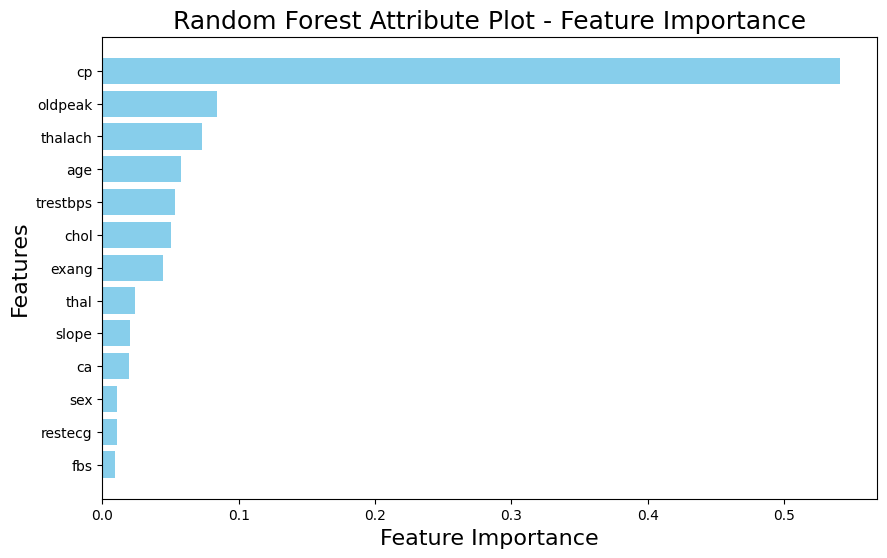

In [117]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color="skyblue")

# Customize Labels and Title
plt.xlabel("Feature Importance", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.title("Random Forest Attribute Plot - Feature Importance", fontsize=18)

# Show plot
plt.show()


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


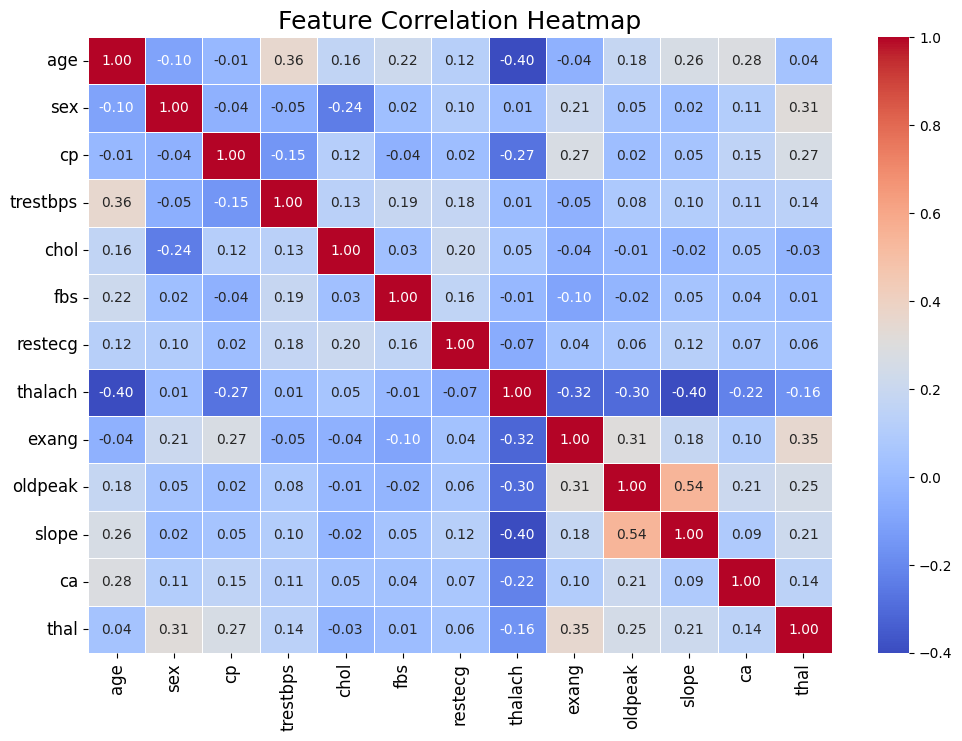

In [121]:
# Compute the correlation matrix for the dataset
correlation_matrix = X_train_over.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Customize Labels and Title
plt.title("Feature Correlation Heatmap", fontsize=18)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

# Show plot
plt.show()


In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np


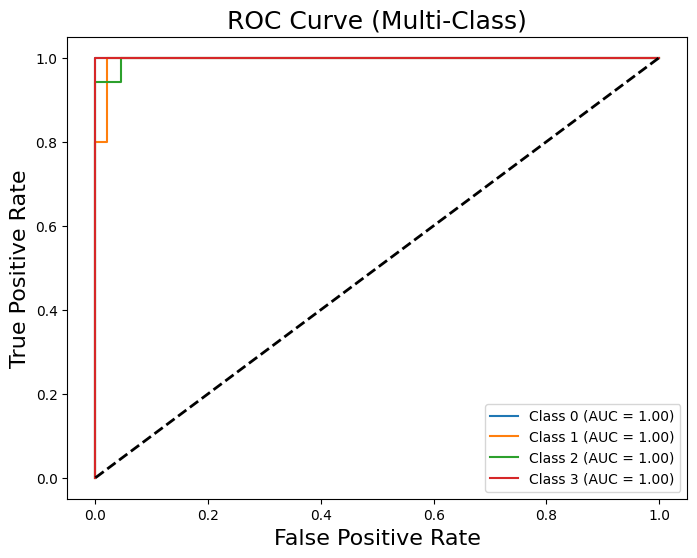

In [119]:
# Get predicted probabilities for the positive class (1) in a binary classification problem
y_pred_proba = best_rf.predict_proba(X_test)

# If it's a multi-class problem, use One-vs-Rest approach
if len(np.unique(y_test)) > 2:
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_auc_score

    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    # Compute ROC curve and AUC for each class
    plt.figure(figsize=(8, 6))
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    # Plot diagonal reference line
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.title("ROC Curve (Multi-Class)", fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

else:
    # Binary Classification Case
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')

    # Plot diagonal reference line
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    # Customize Labels and Title
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.title("ROC Curve (Binary Classification)", fontsize=18)
    plt.legend(loc="lower right")

    # Show Plot
    plt.show()
